In [ ]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)
if (require("ggpmisc") == F) install.packages("ggpmisc")
library(ggpmisc)
if(!require(zoo)) install.packages("zoo")
library(zoo)

In [17]:
sulphur=c(0,5,10,12,15,20,24,26,30,35)
yield=c(4.1,6.2,7.5,8.2,8.8,9.5,10.5,10.4,10.1,10)
dataA=data.frame(sulphur,yield)
print(dataA)

   sulphur yield
1        0   4.1
2        5   6.2
3       10   7.5
4       12   8.2
5       15   8.8
6       20   9.5
7       24  10.5
8       26  10.4
9       30  10.1
10      35  10.0


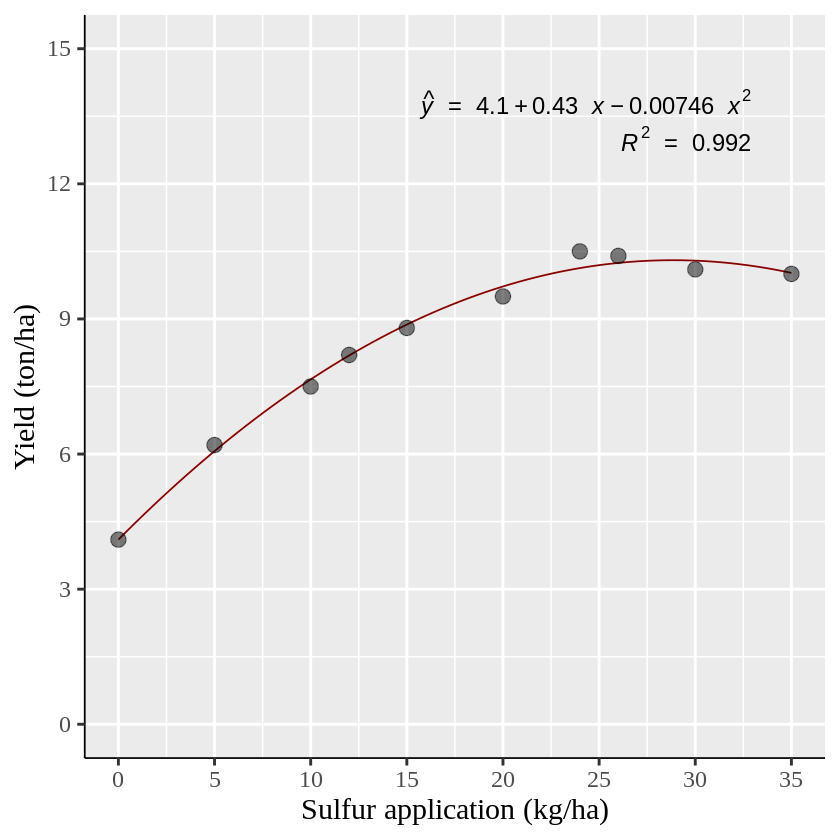

In [18]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)
if (require("ggpmisc") == F) install.packages("ggpmisc")
library(ggpmisc)

ggplot(data=dataA, aes(x=sulphur, y=yield))+
  stat_smooth(method='lm', linetype=1, se=FALSE,
  formula=y~poly(x,2, raw=TRUE), size=0.5, color="dark red") +
  geom_point(alpha=0.5, size=4) +

#Equation
 stat_poly_eq(aes(label= paste(..eq.label.., sep= "~~~")),
              label.x=0.9, label.y=0.9,
              eq.with.lhs= "italic(hat(y))~'='~", eq.x.rhs= "~italic(x)",
              coef.digits=3, formula=y~poly(x,2, raw=TRUE), parse=TRUE, size=5)+
# R-squared
 stat_poly_eq(aes(label=paste(..rr.label.., sep= "~~~")),
              label.x=0.9, label.y=0.85, rr.digits=3,
              formula=y~poly(x,2, raw=TRUE), parse=TRUE, size=5) +

  scale_x_continuous(breaks = seq(0,35,5), limits = c(0,35)) +
  scale_y_continuous(breaks = seq(0,15,3), limits = c(0,15)) +
  labs(y="Yield (ton/ha)", x="Sulfur application (kg/ha)") +
  theme_grey(base_size=18, base_family="serif")+
  theme(axis.line=element_line(linewidth=0.5, colour="black"))

In [19]:
# Create a sequence for the complete range of sulphur
full_range= seq(min(dataA$sulphur), max(dataA$sulphur))

# Interpolate the values for yield
yield_interp= na.approx(dataA$yield, x= dataA$sulphur, xout= full_range)

# Combine the results into a new data frame
df_interp= data.frame (sulphur= full_range, yield= yield_interp)

head (df_interp, 3)
tail (df_interp, 3)

,sulphur,yield
,<int>,<dbl>
1,0,4.10
2,1,4.52
3,2,4.94


,sulphur,yield
,<int>,<dbl>
34,33,10.04
35,34,10.02
36,35,10.00


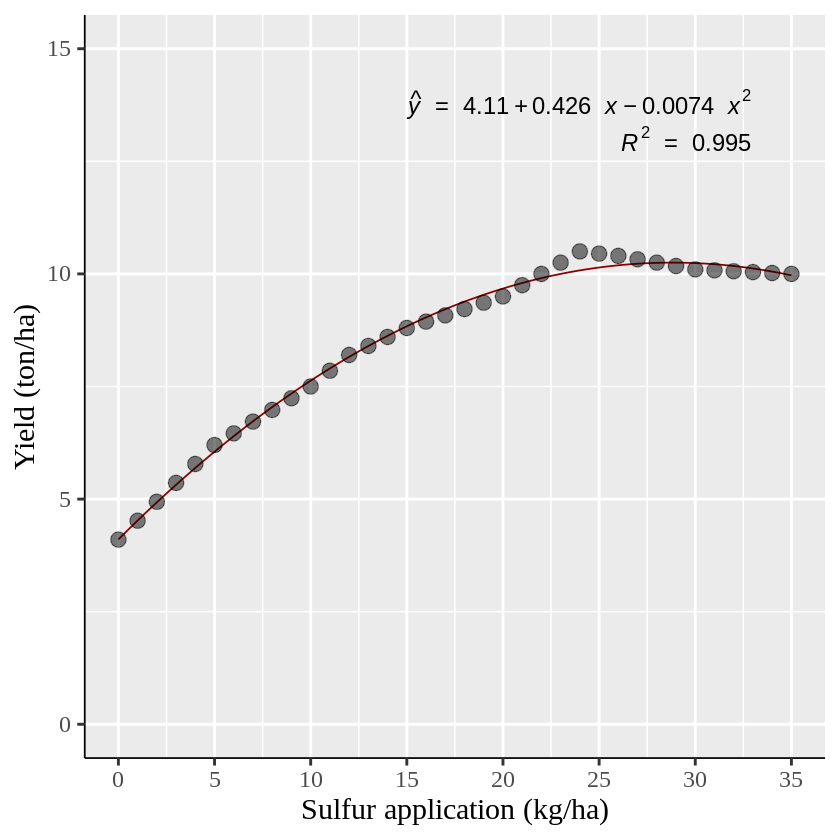

In [20]:
ggplot(data=df_interp, aes(x=sulphur, y=yield))+
  stat_smooth(method='lm', linetype=1, se=FALSE,
              formula=y~poly(x,2, raw=TRUE), size=0.5, color="dark red") +
  geom_point(alpha=0.5, size=4) +

#Equation
 stat_poly_eq(aes(label= paste(..eq.label.., sep= "~~~")),
              label.x=0.9, label.y=0.9,
              eq.with.lhs= "italic(hat(y))~'='~", eq.x.rhs= "~italic(x)",
              coef.digits=3, formula=y~poly(x,2, raw=TRUE), parse=TRUE, size=5)+
# R-squared
 stat_poly_eq(aes(label=paste(..rr.label.., sep= "~~~")),
              label.x=0.9, label.y=0.85, rr.digits=3,
              formula=y~poly(x,2, raw=TRUE), parse=TRUE, size=5) +

  scale_x_continuous(breaks = seq(0,35,5), limits = c(0,35)) +
  scale_y_continuous(breaks = seq(0,15,5), limits = c(0,15)) +
  labs(y="Yield (ton/ha)", x="Sulfur application (kg/ha)") +
  theme_grey(base_size=18, base_family="serif")+
  theme(axis.line=element_line(linewidth=0.5, colour="black"))